# Revamping Business Strategy Using SQL 

This project analyzes a modified version of the Chinook database (a fictional iTunes database) to answer questions to improve business strategy. The database contains information regarding artists, songs and albums for both customers and employees. It is based on real data from an iTunes library and manually generated data.


**Goal**: To improve business strategy by extracting business insights via complex SQLite queries. Specifically, we want to inquire about:

* Most Popular Genres in the USA
* Performance Metrics for Employee Performance
* Sales Data of Customers from Different Countries
* Albums Vs. Individual Tracks
* Most Popular Artists and Genres According to Playlists
* Purchased Vs. Not Purchased Tracks
* Protected vs Non-Protected Media Types

## Summary of Results

We concluded that:

* Based on the sales of tracks across different genres in the USA, Chinook should advertise the albums of **Red Tone** (Punk), **Slim Jim Bites** (Blues) and **Meteor and the Girls** (Pop)

* **Jane Peacock** demonstrates the best sales performance, while **Steve Johnson** the worst, based on Total Dollar Amount in Sales value.

* The top performing country is the **USA**, in terms of both total sales and number of customers. Countries with a smaller customer base **(Czech Republic, United Kingdom, Portugal and India)** show potential for growth as their sales to customer ratio is greater than 1.

* Since there are 4 times more single track purchases comapared to album purchases, Chinook should implement their new **strategy of purchasing popular tracks from albums instead of entire albums from record companies**

* Most popular artist according to playlists is [Eugene Ormandy](https://en.wikipedia.org/wiki/Eugene_Ormandy), with 7 playlist mentions belonging to the **Classical** genre. **However most artists have around 2 to 5 playlist mentions**. We see that Rock is the most popular genre for artists that are mentioned less than thrice in a list, and Classical is the most popular genre for artists mentioned more than 3 times in a list.

* Almost **half** of the tracks within the Chinook store have never been bought. Chinook should look to purchase artists from popular genres and put more effort into advertising existing tracks from unpopular genres.

* **Protected** tracks are much less popular than **Not Protected** tracks, especially in terms of sales

For more details, please refer to the the full analysis below.

## Concepts Used

* Jupyter Notebook
* SQL Queries
* Joins (Inner, Left, Right, Outer, Recursive Joins)
* Joining Rows (Union, Intersect, Except)
* Filtering, Sorting, Grouping, Rounding
* Arithmetic Operations, Aggregate Functions, If/Then logical statements, Column Creation
* Subqueries

# Data Overview

This dataset is provided by the [sqlite tutorial website](https://www.sqlitetutorial.net/sqlite-sample-database/) to practice SQLite. You can download the data file from [here](https://cdn.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip).

Lets start by connecting Jupyter Notebook to the database file.

In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

'Connected: None@chinook.db'

# Data Exploration

Let's load the dataset and look at the tables. We will also load a single table and check out a couple of its rows.

In [2]:
%%sql
SELECT
    name,
    type
FROM sqlite_master
WHERE type IN ("table","view");

Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


In [3]:
%%sql
SELECT *
FROM employee
LIMIT 5;

Done.


employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
1,Adams,Andrew,General Manager,None,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


For the chinook dataset, we have data with 11 tables describing customers' musical records.

* **employee**: table stores employee data such as employee id, last name, first name, etc. It also has a field named ReportsTo to specify who reports to whom.

* **customer**: table stores customer data.

* **invoices & invoice_line**: these two tables store invoice data. The invoice table stores invoice header data and the invoice_line table stores the invoice line items data.

* **artist**: table stores artist data. It is a simple table that contains only the artist id and name.

* **album**: table stores data about a list of tracks. Each album belongs to one artist. However, one artist may have multiple albums.

* **media_type**: table stores media types such as MPEG audio and AAC audio files.

* **genre**: table stores music types such as rock, jazz, metal, etc.

* **track**: table stores data about songs. Each track belongs to one album.

* **playlist & playlist_track**: playlist stores data about playlists. Each playlist contains a list of tracks and each track may belong to multiple playlists. The relationship between the playlist table and playlist_track table is many-to-many. The playlist_track table is used to reflect this relationship

Here's a schema for the database

![Chinook Schema](https://s3.amazonaws.com/dq-content/191/chinook-schema.svg)

# Data Analysis: Most Popular Genres in the USA

**Scenario**: A new record label wants to add 3 albums to the store. The label currently has four albums by artists that don't have any tracks in the store. The genre and artist names to be potentially added are below.

|Artist Name|Genre|
|---|----------|
| Regal |    Hip-Hop   |
|Red Tone| Punk |
|Meteor and the Girls|Pop|
|Slim Jim Bites| Blues| 

The record label specializes in artists from the USA and wants Chinook to advertise the new albums in the USA. Thus, we're interested in finding genres that will be most popular in the USA according to tracks sold.


**Solution**: We will be writing a query that will return the top 10 genres in the USA, with the number of tracks sold - in absolute numbers and percentages.

We will use the following tables:

* `genre`
* `track`
* `invoice_line`
* `invoice`

We will write a paragraph that interprets the data and make a recommendation for three artists whose albums should be purchased for the store, based on sales of tracks from their genres. We'll also display the output of our query graphically, using Python's pandas and matplotlib libraries.

In [4]:
# Query to display the most popular genres in the USA according to tracks sold
query_1 = """
WITH
USA_total_tracks AS
    (
    SELECT 
        COUNT(inv_l.quantity) AS total_tracks
    FROM invoice_line inv_l
    INNER JOIN invoice inv on inv.invoice_id = inv_l.invoice_id
    WHERE inv.billing_country = "USA"
    ),
genre_USA_tracks AS
    (
    SELECT
        tg.name AS 'Genre',
        COUNT(il.quantity) AS 'tracks_sold'
    FROM invoice_line il
    INNER JOIN (
                SELECT 
                    gr.name,
                    tr.track_id
                FROM track tr
                INNER JOIN genre gr ON gr.genre_id = tr.genre_id
                ) tg
                ON tg.track_id = il.track_id
                INNER JOIN invoice inv ON inv.invoice_id = il.invoice_id
    WHERE inv.billing_country is "USA"
    GROUP BY 1
    ORDER BY 2 DESC
    )
SELECT
    g_US.Genre AS "Genre",
    g_US.tracks_sold AS "Tracks Sold",
    ROUND(100*CAST(g_US.tracks_sold AS FLOAT)/(SELECT total_tracks from USA_total_tracks),2) AS "Percentage"
FROM genre_USA_tracks g_US
GROUP BY 2
ORDER BY 2 DESC
LIMIT 10;
"""

# Importing libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Reading our query and database into a DataFrame
conn = sqlite3.connect("chinook.db")
df_1 = pd.read_sql_query(query_1, conn)  
df_1

,Genre,Tracks Sold,Percentage
0,Rock,561,53.38
1,Alternative & Punk,130,12.37
2,Metal,124,11.80
3,R&B/Soul,53,5.04
4,Blues,36,3.43
5,Alternative,35,3.33
6,Pop,22,2.09
7,Hip Hop/Rap,20,1.90
8,Jazz,14,1.33
9,Easy Listening,13,1.24


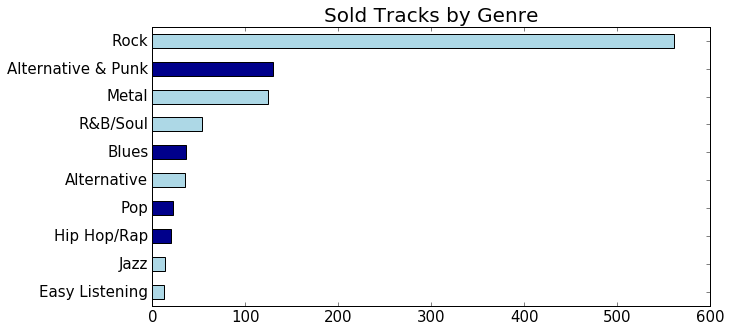

In [5]:
# Resetting Index
df_1 = df_1.set_index("Genre", drop=True)

# Plotting Tracks sold by Genre
fig, ax = plt.subplots(figsize=(10,5)) # Initializing figure
ax = df_1['Tracks Sold'].sort_values().plot.barh(color=['lightblue','lightblue','darkblue','darkblue','lightblue','darkblue','lightblue','lightblue','darkblue','lightblue'])

# Plot Aesthetics
ax.set_title("Sold Tracks by Genre", fontsize=20)
ax.set_ylabel("")
ax.tick_params(axis="both", 
               labelsize=15, 
               left = False)

The most popular genres in the USA are **Rock**, **Alternative & Punk**, and **Metal**, followed by a big gap between all others. Based on our options and the sales of tracks across different genres in the USA, **we should advertise the following artists**:

|Artist Name|Genre|
|---|----------|
| Red Tone |    Punk   |
|Slim Jim Bites| Blues |
|Meteor and the Girls|Pop|

 
It's worth keeping in mind that combined, these three genres only make up 17% of total sales, so we should be on the lookout for artists and albums from the **Rock** genre, which accounts for 53% of sales.

# Data Analysis: Performance Metrics for Employee Performance

**Scenario**: Each customer in the Chinook store is assigned to a sales support agent. Chinook wants to analyze the purchases of customers belonging to each employee and see how the sales support agents rank. 

**Solution**: We will find the birth date, hire data, country, company, total number/% of customers and total number/% of sales for each sales support agent.

We will use the following tables:

* `employee`
* `customer`
* `invoice`

We will write a paragraph that interprets the data and explain any variance which is indicative of employee performance. We'll also represent the information in graphical form, using a grouped bar chart.

In [6]:
# Query to display employee metrics
query_2 = """
SELECT 
    emp.first_name || " " || emp.last_name AS "Employee Name",
    emp.birthdate AS "Birth Date",
    emp.hire_date AS "Hire Date",
    emp.country AS "Country",
    cst.company AS "Company",
    COUNT(inv.invoice_id) AS "Total Customers",
    ROUND(100*CAST(COUNT(inv.invoice_id) AS FLOAT)/CAST((SELECT COUNT(invoice_id) FROM invoice) AS FLOAT),2) AS "Percentage of Customers",
    ROUND(SUM(inv.total),2) AS "Total Dollar Amount",
    ROUND(100*CAST(SUM(inv.total) AS FLOAT)/CAST((SELECT SUM(invoice.total) FROM invoice) AS FLOAT),2) AS "Percentage of Sales"
FROM employee emp
INNER JOIN customer cst ON cst.support_rep_id = emp.employee_id
INNER JOIN invoice inv ON inv.customer_id = cst.customer_id
GROUP BY 1
ORDER BY 8 DESC;
"""
# Reading our query and database into a DataFrame
df_2 = pd.read_sql_query(query_2, conn)  
df_2

,Employee Name,Birth Date,Hire Date,Country,Company,Total Customers,Percentage of Customers,Total Dollar Amount,Percentage of Sales
0,Jane Peacock,1973-08-29 00:00:00,2017-04-01 00:00:00,Canada,None,212,34.53,1731.51,36.77
1,Margaret Park,1947-09-19 00:00:00,2017-05-03 00:00:00,Canada,None,214,34.85,1584.00,33.63
2,Steve Johnson,1965-03-03 00:00:00,2017-10-17 00:00:00,Canada,Telus,188,30.62,1393.92,29.60


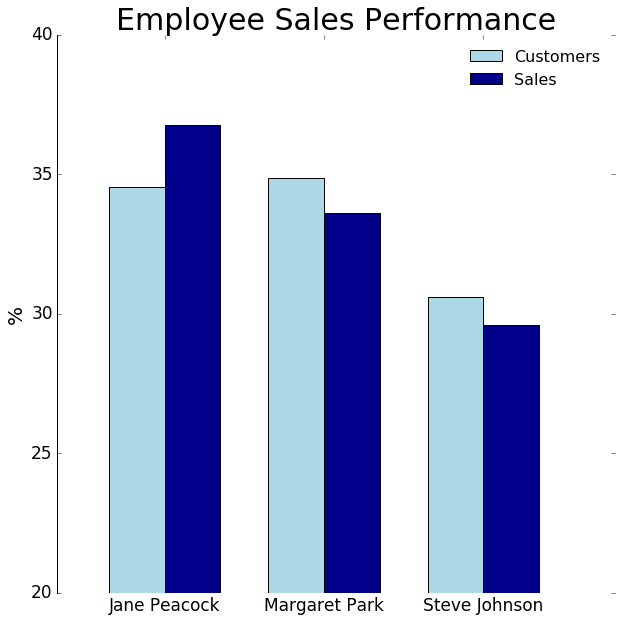

In [7]:
# Resetting Index
df_2 = df_2.set_index("Employee Name", drop=True)

# Function for creating grouped bar charts
def grouped_bar_chart(df,fig_width,fig_height,bar_width,col1,col2,
                   label1,label2,title,ylabel,
                   ylim_lower,ylim_upper,loc,rotation,
                   bbox_to_anchor):
    
    # Converting Series to list
    col1_list = col1.tolist()
    col2_list = col2.tolist()
    
    # Creating Labels from the index
    labels = df.index.tolist()
    
    # Label Locations
    x = np.arange(len(labels))
    
    # Plotting data
    fig, ax = plt.subplots(figsize=(fig_width,fig_height))
    ax.bar(x - bar_width/2, col1_list, bar_width, label=label1,color='lightblue')
    ax.bar(x + bar_width/2, col2_list, bar_width, label=label2,color='darkblue')
    
    # Plot aesthetics
    ax.set_title(title, fontsize=30)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_ylim(ylim_lower, ylim_upper)
    ax.set_xticks(x + bar_width/2)
    ax.set_xticklabels(labels,fontsize=17,rotation=rotation)
    ax.tick_params(bottom = False,labelsize=17)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.legend(loc=loc,bbox_to_anchor=bbox_to_anchor,fontsize=16,frameon=False)
    
# Creating a bar chart for employee metrics
grouped_bar_chart(df_2,10,10,0.35,df_2["Percentage of Customers"],df_2["Percentage of Sales"],
                  "Customers","Sales","Employee Sales Performance","%",20,40,0,0,None)

In total we have 3 sales support agents, all from Canada with incomplete company information. Here are some unique observations:

* Although Margaret Park (2nd employee) was hired later, she has more customers than Jane Peacock (1st employee) who was hired earlier.
* Having more customers doesn't necessarily translate with more Sales.
* There is roughly a 20% difference in Total Amount of Sales between the top and bottom employee.

**Jane Peacock demonstrates the best sales performance, while Steve Johnson the worst, based on Total Dollar Amount in Sales value.**

# Data Analysis: Sales Data of Customers from Different Countries

**Scenario**: Chinook wants to know metrics for countries to understand how different countries compare.

**Solution**: We will collate data on total number and % of customers, total value and % of sales, average order value, and average value of sales per customer for every country.

Since there are countries in our databse with only one customer, we'll group those countries into the "Other" category.The results will be sorted by the total value of sales column in descending order, with the "Other" group at the bottom of the table.

We will use the following tables:

* `customer`
* `invoice`
* `country`

We will write a paragraph that interprets the data and explain any variance which is indicative of country performance. We'll also represent the information in graphical form, using a grouped bar chart.

In [8]:
# Query to display aggregate data for each country
query_3 = """
WITH
main_query AS
    (
    SELECT
        CASE
           WHEN (
                 SELECT COUNT(*)
                 FROM customer
                 WHERE country = cst.country
                ) = 1 THEN "Other"
        ELSE cst.country
        END AS Country,
        COUNT(distinct cst.customer_id) AS "Total Customers",
        ROUND(CAST(100*COUNT(distinct cst.customer_id) AS FLOAT)/CAST((SELECT COUNT(customer_id) FROM customer) AS FLOAT),2) AS "Customer Percentage",
        ROUND(SUM(inv.total),2) AS "Total Value of Sales",
        ROUND(CAST(100*SUM(inv.total) AS FLOAT)/CAST((SELECT SUM(total) FROM invoice) AS FLOAT),2) AS "Sale Percentage",
        ROUND(CAST(SUM(inv.total) AS FLOAT)/CAST(COUNT(cst.customer_id) AS FLOAT),2) AS "Average Order Value",
        ROUND(CAST(SUM(inv.total) AS FLOAT)/CAST(COUNT(distinct cst.customer_id) AS FLOAT),2) AS "Average Value of Sales per Customer"
    FROM customer cst
    INNER JOIN invoice inv ON inv.customer_id = cst.customer_id
    GROUP BY 1
    ORDER BY 4 DESC
    )
SELECT
    "Country",
    "Total Customers",
    "Customer Percentage",
    "Total Value of Sales",
    "Sale Percentage",
    "Average Order Value",
    "Average Value of Sales per Customer"
FROM
    (
    SELECT
        mq.*,
        CASE
            WHEN mq.country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM main_query mq
    )
ORDER BY sort ASC
"""
# Reading our query and database into a DataFrame
df_3 = pd.read_sql_query(query_3, conn)  
df_3

,Country,Total Customers,Customer Percentage,Total Value of Sales,Sale Percentage,Average Order Value,Average Value of Sales per Customer
0,USA,13,22.03,1040.49,22.09,7.94,80.04
1,Canada,8,13.56,535.59,11.37,7.05,66.95
2,Brazil,5,8.47,427.68,9.08,7.01,85.54
3,France,5,8.47,389.07,8.26,7.78,77.81
4,Germany,4,6.78,334.62,7.11,8.16,83.66
5,Czech Republic,2,3.39,273.24,5.80,9.11,136.62
6,United Kingdom,3,5.08,245.52,5.21,8.77,81.84
7,Portugal,2,3.39,185.13,3.93,6.38,92.57
8,India,2,3.39,183.15,3.89,8.72,91.57
9,Other,15,25.42,1094.94,23.25,7.45,73.00


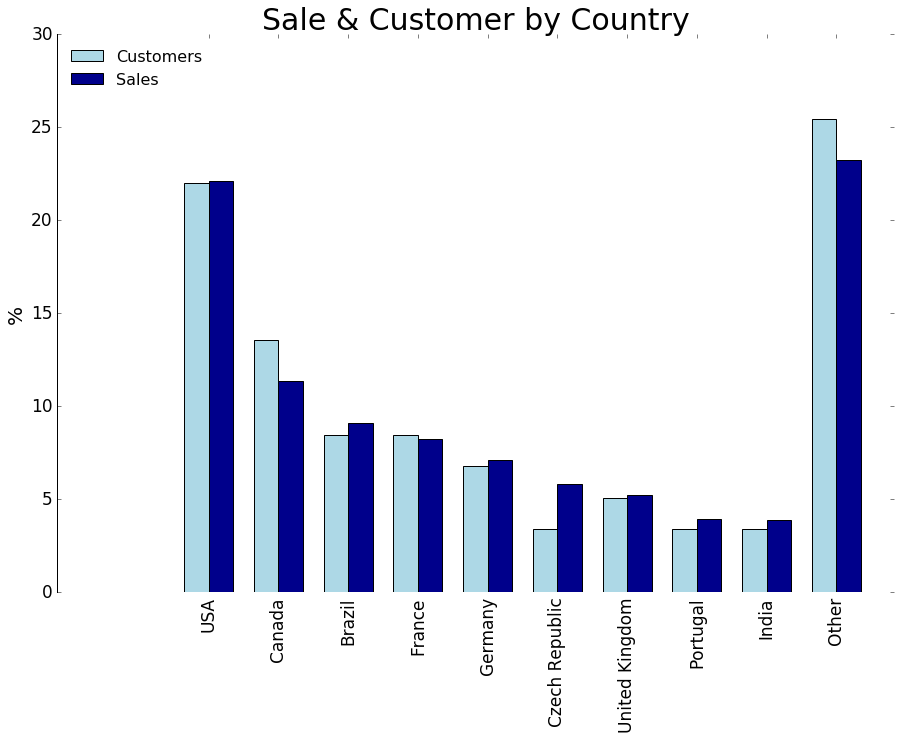

In [9]:
# Resetting Index
df_3 = df_3.set_index("Country", drop=True)

# Creating a grouped bar chart for country metrics
grouped_bar_chart(df_3,15,10,0.35, df_3['Customer Percentage'],df_3['Sale Percentage'],
                  'Customers','Sales','Sale & Customer by Country','%',0,30,"upper left",90,None)

Here are some observations:

* The sales by country are dominated by **USA**, in terms of both total sales and number of customers excluding the **Other** group.

* Countries in the **Other** categories have more combined sales than USA

* Most customers spend between 70 and 90 dollars with the notable exception of customers from the Czech Republic

* There is a **positive correlation** between the number of customers and total sales. MAKE SCATTERPLOT. An interesting observation is that Czech Republic, having only 2 customers, shows the highest average value of sales per customer and, consequently, the highest average order value.

In summary, the top performing country is the **USA**, in terms of both total sales and number of customers. 

Countries with a smaller customer base **(Czech Republic, United Kingdom, Portugal and India)** show potential for growth as their sales to customer ratio is greater than 1.

However, it is worth keeping in mind that the amount of data from these countries is relatively low, so spending on marketing campaigns should be limited as the sample size is not large enough to give us high confidence. A better strategy would be to run small campaigns, collect an analyze the new customers and make sure the trends hold with new customers. 

# Data Analysis: Albums Vs. Individual Tracks

**Scenario**: In the Chinook store, customers are allowed to purchase the whole album or purchase a collection of one or more individual tracks.

The store does not let customers purchase a whole album and then add individual tracks to that same purchase (unless they do that by choosing each track manually). When customers purchase albums they are charged the same price as if they had purchased each of those tracks separately.

Management is currently considering changing their purchasing strategy to save money. The strategy is to purchase only the most popular tracks from each album instead of purchasing entire albums from record companies.

Management have requested to find what percentage of purchases are individual tracks vs. whole albums. Management wants to use this data to understand the effect the new strategy might have on overall revenue.

**Solution**: We will find the percentage of purchases that are individual tracks vs. whole albums. However, there are two edge cases to consider:

1. Albums that have only one or two tracks are likely to be purchased by customers as part of a collection of individual tracks.
2. Customers may decide to manually select every track from an album, and then add a few individual tracks from other albums to their purchase.

Since our analysis is concerned with maximizing revenue we can safely ignore albums consisting of only a few tracks. The company has previously done analysis to confirm that the second situation does not happen often, so we can ignore this.

We will use the following tables:

* `invoice_line`
* `track`

In order to answer the question, we're going to have to identify whether each invoice has all the tracks from an album. We can do this by getting the list of tracks from an invoice and comparing it to the list of tracks from an album. We can find the album to compare the purchase to by looking up the album that one of the purchased tracks belongs to. It doesn't matter which track we pick, since if it's an album purchase, that album will be the same for all tracks. We will write a paragraph to interpret the results and represent the information using a pie chart.

In [10]:
# Query to represent purchase breakdown
query_4 = """
WITH helper_query AS
    (
    SELECT ai.invoice_id,
         CASE
            WHEN (SELECT il.track_id 
                    FROM invoice_line il
                   WHERE il.invoice_id = ai.invoice_id
                  EXCEPT                                          
                  SELECT t.track_id 
                    FROM track t
                  WHERE t.album_id = ai.album_id) IS NULL

            AND  (SELECT t.track_id 
                    FROM track t
                   WHERE t.album_id = ai.album_id                                         
                  EXCEPT                                          
                  SELECT il.track_id 
                    FROM invoice_line il
                  WHERE il.invoice_id = ai.invoice_id) IS NULL
        THEN "Album"
        ELSE "Track"
        END AS Purchase_Type                            
    FROM (SELECT il.invoice_id,                                     
               t.album_id
          FROM invoice_line il
          LEFT JOIN track t ON t.track_id = il.track_id
          GROUP BY il.invoice_id) ai
    )
SELECT 
    Purchase_Type as "Purchase Type",
    COUNT(invoice_id) AS "Total",
    100*ROUND(CAST(COUNT(invoice_id) AS FLOAT)/CAST((SELECT COUNT(*) FROM helper_query) AS FLOAT), 3) AS "Percentage"
FROM helper_query
GROUP BY Purchase_Type
"""
# Reading our query and database into a DataFrame
df_4 = pd.read_sql_query(query_4, conn)  
df_4

,Purchase Type,Total,Percentage
0,Album,114,18.6
1,Track,500,81.4


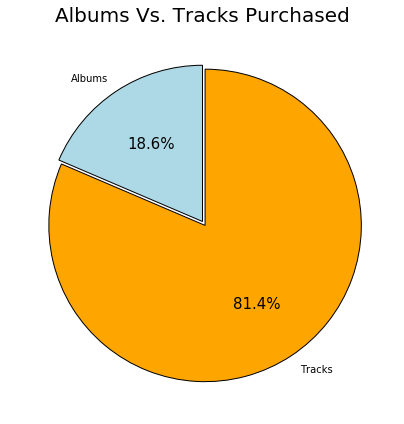

In [11]:
# Resetting Index
df_4 = df_4.set_index("Purchase Type", drop=True)

# Plotting pie chart
df_4_lst = df_4.iloc[[0,1],0].tolist() 
plt.pie(df_4_lst,labels=('Albums', 'Tracks'),
        explode=(0,0.03), 
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 15},
        colors=['lightblue','orange'])

# Plot Aesthetics
plt.title('Albums Vs. Tracks Purchased', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(7,7)

The vast majority of purchases are single tracks - **there are 4 times more single track purchases comapared to album purchases.**

Based on this observation, we would recommend Chinook to implement their strategy of purchasing only most popular tracks from each album instead of entire albums from record companies.

Over 80% of customers would likely not be impacted by this change while the company would be reducing its purchasing expenses.The impact to album-buying cusomters could be mitigated by keeping an inventory of albums from popular artists, genres, or record labels only.

# Data Analysis: Most Popular Artists and Genres According to Playlists
 
**Scenario**: Chinook wants to know most popular artists in customers' playlists. Chinook wants this information to gain valuable insights on further understanding the purchasing startegies of its customers.

**Solution**: We are going to find the most popular artists according to playlists mentioned. The results will be sorted in descending order.

We will use the following tables:

* `playlist`
* `track`
* `album`
* `artist`

We will write a paragraph that interprets the data and represent the information in graphical form, using a grouped bar chart.

In [13]:
%%sql
SELECT 
  artist.name AS "Artist Name",
  COUNT(distinct playlist.playlist_id) AS "Playlist Mentions"
FROM playlist
INNER JOIN playlist_track ON playlist_track.playlist_id = playlist.playlist_id
INNER JOIN track ON track.track_id = playlist_track.track_id
INNER JOIN album ON album.album_id = track.album_id
INNER JOIN artist ON artist.artist_id = album.artist_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

Done.


Artist Name,Playlist Mentions
Eugene Ormandy,7
Academy of St. Martin in the Fields & Sir Neville Marriner,6
Berliner Philharmoniker & Herbert Von Karajan,6
English Concert & Trevor Pinnock,6
The King's Singers,6


We can see that only 1 artist, [Eugene Ormandy](https://en.wikipedia.org/wiki/Eugene_Ormandy) is present in 7 playlist, and the remaining top 4 artists all have 6 mentions.

Let's take a look at the genre these artists belong to.

In [ ]:
%%sql
SELECT DISTINCT(genre.name) AS "Genre"
FROM genre
INNER JOIN track ON track.genre_id = genre.genre_id
INNER JOIN album ON album.album_id = track.album_id
INNER JOIN artist ON artist.artist_id = album.artist_id
WHERE artist.name = "Eugene Ormandy" 
OR artist.name = "The King's Singers"
OR artist.name = "English Concert & Trevor Pinnock"
OR artist.name = "Berliner Philharmoniker & Herbert Von Karajan" 
OR artist.name = "Academy of St. Martin in the Fields & Sir Neville Marriner";

From our first query regarding popular genres in the USA, we know that the **Classical** genre didn't make the top 10 list of genres in the USA. Hence, in spite these artists being present in most playlists, a strategy for Chinook to buy more tracks of theirs is not profitable and should be avoided.  

Let's take a look at the distribution of Playlist Mentions with the most popular genres.

In [14]:
# Query to represent popular genres according to frequency of artist mentioned in playlists
query_5 = """
WITH helper_query AS
    (
    SELECT 
      artist.name AS Name,
      COUNT(distinct playlist.playlist_id) AS Playlist,
      genre.name AS Genre_Name
    FROM playlist
    INNER JOIN playlist_track ON playlist_track.playlist_id = playlist.playlist_id
    INNER JOIN track ON track.track_id = playlist_track.track_id
    INNER JOIN genre ON genre.genre_id = track.genre_id
    INNER JOIN album ON album.album_id = track.album_id
    INNER JOIN artist ON artist.artist_id = album.artist_id
    GROUP BY 1
    ORDER BY 2 DESC
    ),
second_helper_query AS
    (
    SELECT
        COUNT(Name) AS "Frequency",
        Playlist,
        Genre_Name
    FROM helper_query
    GROUP BY 2,3
    ORDER BY 1
    )
SELECT
    Playlist AS "Times Artist Mentioned in Playlist",
    SUM("Frequency") AS "Frequency",
    Genre_Name AS "Most Popular Genre"
    FROM second_helper_query
    GROUP BY 1
"""
# Reading our query and database into a DataFrame
df_5 = pd.read_sql_query(query_5, conn)  
df_5

,Times Artist Mentioned in Playlist,Frequency,Most Popular Genre
0,2,52,Rock
1,3,68,Rock
2,4,48,Classical
3,5,31,Classical
4,6,4,Classical
5,7,1,Classical


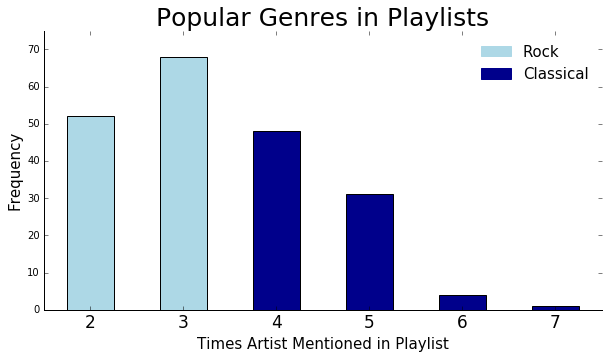

In [15]:
# Resetting Index
df_5 = df_5.set_index("Times Artist Mentioned in Playlist", drop=True)

# Importing libraries
import matplotlib.patches as mpatches

# Plotting Tracks sold by Genre
fig, ax = plt.subplots(figsize=(10,5))
ax = df_5['Frequency'].plot.bar(color=['lightblue','lightblue','darkblue','darkblue','darkblue','darkblue'])

# Plot Aesthetics
ax.set_title("Popular Genres in Playlists", fontsize=25)
ax.set_ylabel("Frequency",fontsize=15)
ax.set_xlabel("Times Artist Mentioned in Playlist", fontsize=15)
ax.set_ylim(0, 75)
ax.set_xticklabels([2,3,4,5,6,7],fontsize=17,rotation=0)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
red_patch = mpatches.Patch(color='lightblue', label='Rock')
blue_patch = mpatches.Patch(color='darkblue', label='Classical')
ax.legend(handles=[red_patch, blue_patch],loc="upper right",fontsize=15,frameon=False) 

Most artists have around 2 to 5 playlist mentions. We see that **Rock** is the most popular genre for artists that are mentioned less than thrice in a list, and **Classical** is the most popular genre for artists mentioned more than 3 times in a list. This makes more sense with our results regarding popular genres in the USA.

It is worth mentioning that **Rock** and **Classical** are not the genres that make up the entire playlist, they only represent the majority genre, hence the 'most' popular assumption.

In summary, although the most popular artist belongs to the Classical genre with the highest (7) playlist mentions, the majority of artists within playlists belong to the **Rock** genre.

# Data Anlaysis: Purchased vs Not Purchased Tracks

**Scenario**: Chinook wants to know metrics for Purchases Vs. Not Purchased tracks.

**Solution**: We will calculate how many unique tracks were sold. We will have to distinguish between the entire inventory of tracks in the `track table` and the distinct instances of tracks from the `invoice_line table`.

We will use the following tables:
* `track`
* `invoice_line`

We will write a paragraph that interprets the data and present our results in graphical form using a pie chart.

In [16]:
# Query to represent breakdown of tracks in the store
query_6 = """
SELECT
(SELECT COUNT(distinct track_id) FROM track) AS "Total Tracks",
COUNT(distinct track_id) AS "Tracks Purchased",
(SELECT COUNT(distinct track_id) FROM track) - COUNT(distinct track_id)
AS "Tracks Not Purchased",
ROUND(CAST(COUNT(distinct track_id) AS FLOAT)/CAST((SELECT COUNT(distinct track_id) FROM track) AS FLOAT),2) As "Percent Purchased"
FROM invoice_line
"""
# Reading our query and database into a DataFrame
df_6 = pd.read_sql_query(query_6, conn)
df_6['Percent Not Purchased'] = 1 - df_6['Percent Purchased'] # Creating not purchased percentage column
df_6

,Total Tracks,Tracks Purchased,Tracks Not Purchased,Percent Purchased,Percent Not Purchased
0,3503,1806,1697,0.52,0.48


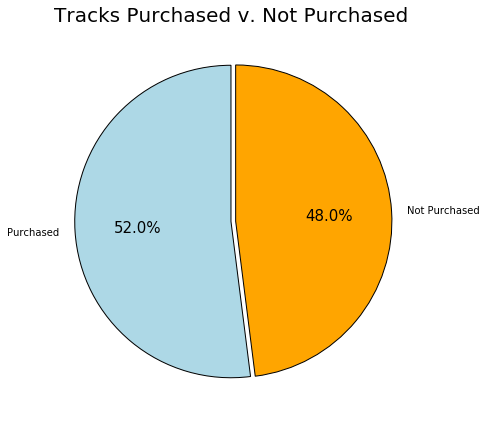

In [17]:
# Plotting pie chart
list1 = df_6.iloc[0,[3,4]].tolist()
plt.pie(list1,labels=('Purchased', 'Not Purchased'),
        explode=(0,0.03), 
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 15},
        colors=['lightblue','orange'])

# Plot Aesthetics
plt.title('Tracks Purchased v. Not Purchased', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(7,7)

Almost half of the tracks within the Chinook store have never been bought - possible reasons for this could be unpopular genres or artists. Let's see what are the top genres and aritsts within the tracks not purchased category.

In [18]:
# Query to represent genre for tracks not purchased
query_7 = """
WITH helper_query AS
(
SELECT
 track_id,
 genre_id
FROM track

EXCEPT

SELECT
 invoice_line.track_id,
 track.genre_id
FROM invoice_line
INNER JOIN track on track.track_id = invoice_line.track_id
)
SELECT
genre.name AS "Genre",
COUNT(distinct track_id) AS "Tracks Not Purchased",
ROUND(100*CAST(COUNT(track_id) AS FLOAT)/CAST((SELECT COUNT(track_id) FROM helper_query) AS FLOAT),2) AS "Percentage"
FROM helper_query
INNER JOIN genre ON genre.genre_id = helper_query.genre_id
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10;
"""
# Reading our query and database into a DataFrame
df_7 = pd.read_sql_query(query_7, conn)
df_7

,Genre,Tracks Not Purchased,Percentage
0,Latin,460,27.11
1,Rock,382,22.51
2,Alternative & Punk,156,9.19
3,Metal,136,8.01
4,TV Shows,91,5.36
5,Jazz,69,4.07
6,Drama,63,3.71
7,Classical,58,3.42
8,Soundtrack,38,2.24
9,Reggae,36,2.12


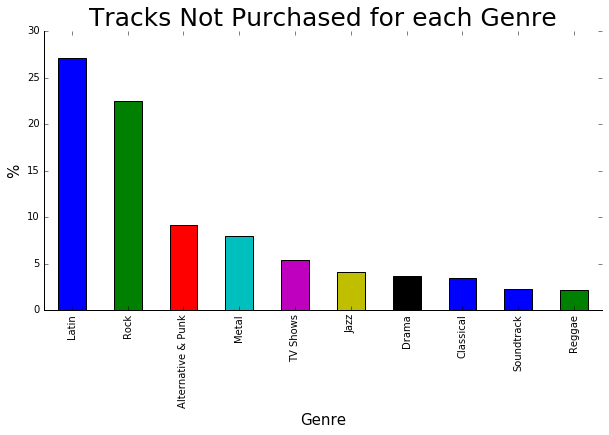

In [19]:
# Resetting Index
df_7 = df_7.set_index("Genre", drop=True)

# Plotting Tracks sold by Genre
fig, ax = plt.subplots(figsize=(10,5))
ax = df_7['Percentage'].plot.bar()

# Plot Aesthetics
ax.set_title("Tracks Not Purchased for each Genre", fontsize=25)
ax.set_ylabel("Frequency",fontsize=15)
ax.set_xlabel("Genre", fontsize=15)
ax.set_ylabel("%", fontsize=15)
ax.set_ylim(0, 30)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

The most popular artist for tracks not purchased is **Latin** followed by **Rock** and **Alternative & Punk**. It is interesting to see the **Rock** genre in this list since it is the most popular genre within the USA according to tracks sold. An interesting observation would be to look at specific artists within the **Rock** genre which are unpopular.

In summary, Chinook should look to purchase artists from popular genres and put more effort into advertising existing tracks from unpopular genres.

# Data Analysis: Protected vs Non-Protected Media Types

**Scenario**: Any given track sold by Chinook is either protected or non-protected. A protected media type has associated rules for using its content. It may be encrypted using some form of digital rights management encryption. The purchaser is not able to make copies and is restricted to listening the platform from which they bought it (iTunes for example). A non-protected track allows the purchaser to make copies and listen to it on multiple platforms.

In Chinook protected tracks are identified by the following `media_type_id`'s:

* Protected AAC audio file
* Protected MPEG-4 video file

Non-Protected tracks are identified by these `media_type_id`'s:

* MPEG audio file
* Purchased AAC audio file
* AAC audio file

**Solution**: We will calculate the percentage of protected vs. non-protected tracks. Then, we will see the breakdown of protected vs. non-protected tracks for sold and not sold tracks.

We will use the following tables:

* `track`
* `media_type`

We will write a paragraph that interprets the data and present it in graphical form. 

In [20]:
# Query to find the breakdown of protected and not protected tracks
query_8 = """
WITH helper_query AS
    (
    SELECT *,
        CASE
            WHEN media_type_id = 2 THEN "Protected"
            WHEN media_type_id = 3 THEN "Protected"
            ELSE "Not Protected"
        END AS Type
    FROM track
    )
SELECT
    Type AS "Type - All Tracks",
    COUNT(Type) AS Count,
    100*ROUND(CAST(COUNT(Type) AS FLOAT)/CAST((SELECT COUNT(Type) FROM helper_query) AS FLOAT),2) AS "Percentage"
FROM helper_query
GROUP BY 1
"""
# Reading our query and database into a DataFrame
df_8 = pd.read_sql_query(query_8, conn)
df_8

,Type - All Tracks,Count,Percentage
0,Not Protected,3052,87.0
1,Protected,451,13.0


In [22]:
# Query to find the breakdown of protected and not protected sold tracks
query_9 = """
WITH helper_query AS
 (
  SELECT *,
     CASE
         WHEN track_id in (SELECT track_id FROM invoice_line) THEN "Yes - Sold"
         ELSE "No - Not Sold"
    END AS Purchased,
     CASE
            WHEN media_type_id = 2 THEN "Protected"
            WHEN media_type_id = 3 THEN "Protected"
            ELSE "Not Protected"
        END AS Type
  FROM track
 ) 
SELECT
Type AS "Type - Sold",
COUNT(Purchased) AS Count,
100*ROUND(CAST(COUNT(Purchased) AS FLOAT)/CAST((SELECT COUNT(Purchased) FROM helper_query WHERE Purchased is "Yes - Sold") AS FLOAT),2) AS Percentage
FROM helper_query
WHERE Purchased is "Yes - Sold"
GROUP BY 1
"""
# Reading our query and database into a DataFrame
df_9 = pd.read_sql_query(query_9, conn)
df_9

,Type - Sold,Count,Percentage
0,Not Protected,1652,91.0
1,Protected,154,9.0


In [24]:
# Query to find the breakdown of protected and not protected not sold tracks
query_10 = """
WITH helper_query AS
 (
  SELECT *,
     CASE
         WHEN track_id in (SELECT track_id FROM invoice_line) THEN "Yes - Sold"
         ELSE "No - Not Sold"
    END AS Purchased,
     CASE
            WHEN media_type_id = 2 THEN "Protected"
            WHEN media_type_id = 3 THEN "Protected"
            ELSE "Not Protected"
        END AS Type
  FROM track
 ) 
SELECT
Type AS "Type - Not Sold",
COUNT(Purchased) AS Count,
100*ROUND(CAST(COUNT(Purchased) AS FLOAT)/CAST((SELECT COUNT(Purchased) FROM helper_query WHERE Purchased is "No - Not Sold") AS FLOAT),2) AS Percentage
FROM helper_query
WHERE Purchased is "No - Not Sold"
GROUP BY 1
"""
# Reading our query and database into a DataFrame
df_10 = pd.read_sql_query(query_10, conn)
df_10

,Type - Not Sold,Count,Percentage
0,Not Protected,1400,82.0
1,Protected,297,18.0


In [25]:
# Query to find the breakdown of tracks accordign to purchase and protection type
query_11 = """
WITH helper_query AS
 (
  SELECT *,
     CASE
         WHEN track_id in (SELECT track_id FROM invoice_line) THEN "Yes - Sold"
         ELSE "No - Not Sold"
    END AS Purchased,
     CASE
            WHEN media_type_id = 2 THEN "Protected"
            WHEN media_type_id = 3 THEN "Protected"
            ELSE "Not Protected"
        END AS Type
  FROM track
 ) 
SELECT
Type AS "Track Type",
Purchased,
COUNT(Purchased) AS Count,
100*ROUND(CAST(COUNT(Purchased) AS FLOAT)/CAST((SELECT COUNT(Purchased) FROM helper_query) AS FLOAT),2) AS Percentage
FROM helper_query
GROUP BY 1,2
"""
# Reading our query and database into a DataFrame
df_11 = pd.read_sql_query(query_11, conn)
df_11

,Track Type,Purchased,Count,Percentage
0,Not Protected,No - Not Sold,1400,40.0
1,Not Protected,Yes - Sold,1652,47.0
2,Protected,No - Not Sold,297,8.0
3,Protected,Yes - Sold,154,4.0


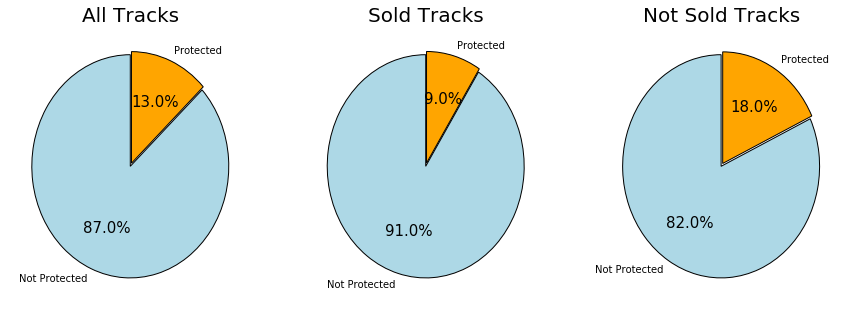

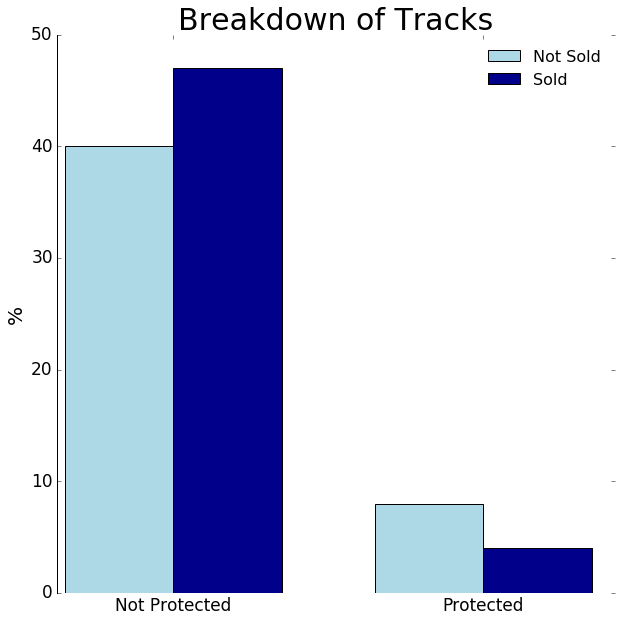

In [26]:
# Transform DataFrame into a list for plt.pie
df_8 = df_8.set_index('Type - All Tracks',drop=True)
lst_8 = df_8.iloc[[0,1],1].tolist()
df_9 = df_9.set_index('Type - Sold',drop=True)
lst_9 = df_9.iloc[[0,1],1].tolist()
df_10 = df_10.set_index('Type - Not Sold',drop=True)
lst_10 = df_10.iloc[[0,1],1].tolist()

# Initialzing figures
fig = plt.figure(figsize=(15,5)) 
ax_1 = fig.add_subplot(1,3,1)
ax_2 = fig.add_subplot(1,3,2)
ax_3 = fig.add_subplot(1,3,3)

# Plotting Pie Chart for tables 
ax_1.pie(lst_8,labels=('Not Protected', 'Protected'),
        explode=(0,0.03), 
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 15},
        colors=['lightblue','orange'])
ax_1.set_title('All Tracks', fontsize=20)

ax_2.pie(lst_9,labels=('Not Protected', 'Protected'),
        explode=(0,0.03), 
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 15},
        colors=['lightblue','orange'])
ax_2.set_title('Sold Tracks', fontsize=20)

ax_3.pie(lst_10,labels=('Not Protected', 'Protected'),
        explode=(0,0.03), 
        startangle=90,
        autopct='%1.1f%%',
        textprops={'fontsize': 15},
        colors=['lightblue','orange'])
ax_3.set_title('Not Sold Tracks', fontsize=20)

# Transforming DataFrame for plotting
data_11 = {'Track Type':  ['Not Protected', 'Protected'],
        'Not Sold': [40,8], 'Sold': [47,4]}
df_11 = pd.DataFrame (data_11, columns = ['Track Type','Not Sold','Sold'],)
df_11 = df_11.set_index('Track Type',drop=True)

# Plotting bar chart for second table
grouped_bar_chart(df_11,10,10,0.35,df_11['Not Sold'],df_11['Sold'],
                   'Not Sold','Sold','Breakdown of Tracks','%',
                   0,50,"upper right",0,None)

* Majority of the tracks within the Chinook Storee are Not Protected. This holds true for when we see All tracks, Sold Tracks and Unsold Tracks
* Customers do not seem to make purchasing decisions based on the protected status of a track
* The majority of tracks sold are not protected (47%) compared to protected tracks (4%), within the context of overall tracks
* There are almost twice as many tracks in the Protected category that are Not Sold (8%) compared to Sold (4%), within the context of overall tracks
* There are more tracks in the Not Protected category that are Sold (47%) compared to Not Sold (40%), within the context of overall tracks

To summarize, **Protected tracks are much less popular than Not Protected tracks, especially in terms of sales.** This can be explained by the loose rules associated with the use and ownership of Not Protected Tracks (can be played on multiple platforms, easily copied etc). Hence, as a future strategy, it is not recommended to the store to purchase such tracks from record companies.

# Conclusion

